## The Effect of Diet on Covid-19 Fatality


Problem: Due to the pandemic, many people are having to alter their diets due to food limitations. The animal agricultrue industry has suffered during the pandemic, thus causing many people to adapt and integrate vegetarian, vegan, or plant-based foods into their diets.

Hypothesis: Adopting a healthier diet which includes more plant-based foods can aid in the prevention of becoming ill from Covid-19.

Goals and Success Metrics: By showing a larger consumption of plants versus meats and/or animal fats, a correlation can be made that a healthy diet will depict a decrease in Covid-19 deaths. 
Overall, a switch to a healthy diet can correlate to a decrease in the amount of individuals becoming sick.

Limitations: Other variables affecting health, such as genetics. Also, false results in data. 

Data Set: UDSA, JHU https://github.com/CSSEGISandData/COVID-19, https://www.kaggle.com/mariaren/covid19-healthy-diet-dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pwd

'/Users/monikaabraham/Desktop'

In [3]:
diet = pd.read_csv('Food_Supply_kcal_Data.csv')
diet.head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0000,4.7774,0.8504,0.0,37.1186,0.1501,0.0000,1.4757,1.2006,...,2.3012,0.7504,4.5,29.8,0.096578,0.003532,0.069785,0.023261,38928000.0,%
1,Albania,0.9120,16.0930,1.0591,0.0,16.2107,0.8091,0.1471,3.8982,3.8688,...,2.8244,2.7508,22.3,6.2,0.260042,0.008034,0.133686,0.118323,2838000.0,%
2,Algeria,0.0896,6.0326,0.1941,0.0,25.0112,0.4181,0.1195,3.1805,1.2543,...,5.7638,2.0457,26.6,3.9,0.086983,0.003089,0.060908,0.022986,44357000.0,%
3,Angola,1.9388,4.6927,0.2644,0.0,18.3521,0.0441,0.8372,2.3133,2.9302,...,4.2741,0.3525,6.8,25,0.005861,0.000271,0.001931,0.003659,32522000.0,%
4,Antigua and Barbuda,2.3041,15.3672,1.5429,0.0,13.7215,0.2057,1.7280,3.6824,7.0356,...,4.6904,1.2960,19.1,NaN,0.094898,0.003061,0.089796,0.002041,98000.0,%


In [4]:
diet.isnull().sum()

Country                          0
Alcoholic Beverages              0
Animal Products                  0
Animal fats                      0
Aquatic Products, Other          0
Cereals - Excluding Beer         0
Eggs                             0
Fish, Seafood                    0
Fruits - Excluding Wine          0
Meat                             0
Milk - Excluding Butter          0
Miscellaneous                    0
Offals                           0
Oilcrops                         0
Pulses                           0
Spices                           0
Starchy Roots                    0
Stimulants                       0
Sugar Crops                      0
Sugar & Sweeteners               0
Treenuts                         0
Vegetal Products                 0
Vegetable Oils                   0
Vegetables                       0
Obesity                          3
Undernourished                   7
Confirmed                        9
Deaths                           9
Recovered           

### Above we can see that there are a few missing values in specific columns. 
Since we are looking for a correlation regarding Covid-19 deaths and a plant-based diet, we will specifically look at these columns.
Lets clean up some data!

In [33]:
#See Column titles
diet.columns

Index(['Country', 'Alcoholic Beverages', 'Animal_Products', 'Animal_Fats',
       'Aquatic Products, Other', 'Cereals', 'Eggs', 'Seafood', 'Fruits',
       'Meat', 'Milk - Excluding Butter', 'Miscellaneous', 'Offals',
       'Oilcrops', 'Pulses', 'Spices', 'Starchy Roots', 'Stimulants',
       'Sugar Crops', 'Sugar & Sweeteners', 'Treenuts', 'Vegetable_Products',
       'Vegetable Oils', 'Vegetables', 'Obesity', 'Undernourished',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'Population',
       'Unit (all except Population)'],
      dtype='object')

### Lets rename columns so they do not have spaces for ease of use 

In [6]:
diet.rename(columns={
    'Animal Products': 'Animal_Products', 
    'Animal fats': 'Animal_Fats', 
    'Fish, Seafood': 'Seafood',
    'Fruits - Excluding Wine': 'Fruits',
    'Vegetal Products': 'Vegetable_Products',
    'Cereals - Excluding Beer': 'Cereals'
}, inplace=True)

In [32]:
diet.columns

Index(['Country', 'Alcoholic Beverages', 'Animal_Products', 'Animal_Fats',
       'Aquatic Products, Other', 'Cereals', 'Eggs', 'Seafood', 'Fruits',
       'Meat', 'Milk - Excluding Butter', 'Miscellaneous', 'Offals',
       'Oilcrops', 'Pulses', 'Spices', 'Starchy Roots', 'Stimulants',
       'Sugar Crops', 'Sugar & Sweeteners', 'Treenuts', 'Vegetable_Products',
       'Vegetable Oils', 'Vegetables', 'Obesity', 'Undernourished',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'Population',
       'Unit (all except Population)'],
      dtype='object')

In [8]:
#First lets look at the relationship between consumption of animal products and Covid-19 deaths:
meat_deaths = diet[['Country', 'Animal_Products', 'Animal_Fats', 'Eggs', 'Seafood', 'Meat', 'Confirmed', 'Deaths', 'Population']]

In [9]:
meat_deaths.shape

(170, 9)

In [10]:
meat_deaths.head(20)

,Country,Animal_Products,Animal_Fats,Eggs,Seafood,Meat,Confirmed,Deaths,Population
0,Afghanistan,4.7774,0.8504,0.1501,0.0000,1.2006,0.096578,0.003532,38928000.0
1,Albania,16.0930,1.0591,0.8091,0.1471,3.8688,0.260042,0.008034,2838000.0
2,Algeria,6.0326,0.1941,0.4181,0.1195,1.2543,0.086983,0.003089,44357000.0
3,Angola,4.6927,0.2644,0.0441,0.8372,2.9302,0.005861,0.000271,32522000.0
4,Antigua and Barbuda,15.3672,1.5429,0.2057,1.7280,7.0356,0.094898,0.003061,98000.0
5,Argentina,14.9869,1.0650,0.8643,0.2006,9.4459,0.649159,0.012568,45377000.0
6,Armenia,12.8330,1.7706,0.7310,0.1787,4.2235,1.409438,0.027673,2956000.0
7,Australia,15.6146,1.9027,0.4681,0.6040,7.4902,0.091473,0.001635,25754000.0
8,Austria,15.6106,5.2532,0.7853,0.4062,5.0095,0.262172,0.008167,8914000.0
9,Azerbaijan,8.1682,1.3050,0.5478,0.0967,2.9322,0.338534,0.005006,10108000.0


In [11]:
meat_deaths.dtypes

Country             object
Animal_Products    float64
Animal_Fats        float64
Eggs               float64
Seafood            float64
Meat               float64
Confirmed          float64
Deaths             float64
Population         float64
dtype: object

## I want to pull data from only the countries with a larger population.
Therefore, lets run  something to look at only those countries with a population >= mean

In [36]:
#Find the mean of the Population column.
diet['Population'].describe()

count    1.700000e+02
mean     4.452364e+07
std      1.564182e+08
min      5.400000e+04
25%      2.816250e+06
50%      1.018150e+07
75%      3.271625e+07
max      1.402385e+09
Name: Population, dtype: float64

In [14]:
#Include only those countries with a population >= mean and drop Countries with no conclusive data for 'Confirmed' Covid-19 cases.
meat_pop = meat_deaths[meat_deaths['Population'] >= 4.452364e+07 ].dropna(subset=['Confirmed'])

In [15]:
meat_pop.shape

(30, 9)

In [16]:
meat_pop.head(30)

,Country,Animal_Products,Animal_Fats,Eggs,Seafood,Meat,Confirmed,Deaths,Population
5,Argentina,14.9869,1.0650,0.8643,0.2006,9.4459,0.649159,0.012568,4.537700e+07
11,Bangladesh,2.3695,0.1541,0.2312,0.8284,0.3468,0.162859,0.002154,1.698090e+08
20,Brazil,13.2061,1.5238,0.4464,0.2309,7.1571,1.576963,0.050919,2.118120e+08
30,China,16.1844,1.1773,1.2349,1.2872,9.8896,0.006373,0.000335,1.402385e+09
31,Colombia,8.8544,0.4363,0.7433,0.2424,4.0717,0.947197,0.030534,4.944400e+07
44,Egypt,4.1999,0.5269,0.1957,0.6322,1.6408,0.095706,0.005119,1.008030e+08
48,Ethiopia,2.0182,0.1519,0.0434,0.0217,0.6510,0.025998,0.000459,1.149160e+08
51,France,16.9899,3.6818,0.6183,0.8994,6.1551,0.389536,0.046828,6.494000e+07
56,Germany,15.3684,4.1620,0.6187,0.5343,5.0759,0.270116,0.011086,8.330000e+07
68,India,5.5622,1.4899,0.2384,0.2582,0.2980,0.189105,0.003637,1.400100e+09


## Lets look at the correlation between a diet consisting of mostly plants versus Covid-19 deaths 
(Covid-19 deaths are displayed as a percentage of current population for each country)

In [19]:
diet.columns

Index(['Country', 'Alcoholic Beverages', 'Animal_Products', 'Animal_Fats',
       'Aquatic Products, Other', 'Cereals', 'Eggs', 'Seafood', 'Fruits',
       'Meat', 'Milk - Excluding Butter', 'Miscellaneous', 'Offals',
       'Oilcrops', 'Pulses', 'Spices', 'Starchy Roots', 'Stimulants',
       'Sugar Crops', 'Sugar & Sweeteners', 'Treenuts', 'Vegetable_Products',
       'Vegetable Oils', 'Vegetables', 'Obesity', 'Undernourished',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'Population',
       'Unit (all except Population)'],
      dtype='object')

In [20]:
veg_deaths= diet[['Country', 'Fruits', 'Treenuts', 'Cereals', 'Vegetable_Products', 'Vegetables', 'Confirmed', 'Deaths', 'Population']]
veg_pop = veg_deaths[veg_deaths['Population'] >= 4.452364e+07 ].dropna(subset=['Confirmed'])

In [21]:
veg_pop.shape

(30, 9)

In [38]:
veg_pop.head(30)

,Country,Fruits,Treenuts,Cereals,Vegetable_Products,Vegetables,Confirmed,Deaths,Population
5,Argentina,1.4663,0.0463,16.7927,34.9900,0.8643,0.649159,0.012568,4.537700e+07
11,Bangladesh,0.6550,0.1156,37.5265,47.6401,0.6165,0.162859,0.002154,1.698090e+08
20,Brazil,1.7239,0.0770,14.5913,36.8016,0.5541,1.576963,0.050919,2.118120e+08
30,China,1.2924,0.7797,17.3827,33.8235,2.4645,0.006373,0.000335,1.402385e+09
31,Colombia,4.6857,0.1777,15.3337,41.1375,0.6140,0.947197,0.030534,4.944400e+07
44,Egypt,2.5591,0.0602,32.2144,45.7926,1.5806,0.095706,0.005119,1.008030e+08
48,Ethiopia,0.2821,0.0868,31.5321,47.9601,0.2821,0.025998,0.000459,1.149160e+08
51,France,1.6582,0.4216,13.8983,33.0101,0.9837,0.389536,0.046828,6.494000e+07
56,Germany,1.5607,0.7593,12.4016,34.6316,1.0827,0.270116,0.011086,8.330000e+07
68,India,1.4303,0.1986,27.6520,44.4378,1.1323,0.189105,0.003637,1.400100e+09


In [23]:
#Sort to see which Countries consume the highest amount of Animal Products
meat_pop.sort_values(by='Animal_Products', ascending=False).head(31)

,Country,Animal_Products,Animal_Fats,Eggs,Seafood,Meat,Confirmed,Deaths,Population
51,France,16.9899,3.6818,0.6183,0.8994,6.1551,0.389536,0.046828,6.494000e+07
30,China,16.1844,1.1773,1.2349,1.2872,9.8896,0.006373,0.000335,1.402385e+09
56,Germany,15.3684,4.1620,0.6187,0.5343,5.0759,0.270116,0.011086,8.330000e+07
5,Argentina,14.9869,1.0650,0.8643,0.2006,9.4459,0.649159,0.012568,4.537700e+07
159,United Kingdom,14.2211,1.5607,0.6272,0.5251,6.5636,0.476985,0.069671,6.716000e+07
161,United States of America,13.6201,1.3009,0.7832,0.4779,6.1065,1.637943,0.051550,3.298780e+08
20,Brazil,13.2061,1.5238,0.4464,0.2309,7.1571,1.576963,0.050919,2.118120e+08
141,Spain,13.1824,1.0093,0.8105,1.2999,5.9642,0.719666,0.060076,4.763500e+07
126,Russian Federation,12.7641,2.1273,0.9075,0.6992,4.8349,0.627479,0.010668,1.467330e+08
74,Italy,12.5657,2.1014,0.6389,0.7951,5.0121,0.421114,0.058704,6.029600e+07


In [24]:
#Sort to see which Countries consume the highest amount of Vegetables
veg_pop.sort_values('Vegetables', ascending=False).head(31)

,Country,Fruits,Treenuts,Cereals,Vegetable_Products,Vegetables,Confirmed,Deaths,Population
30,China,1.2924,0.7797,17.3827,33.8235,2.4645,0.006373,0.000335,1.402385e+09
82,"Korea, South",1.1279,0.4749,20.5847,40.6649,2.4488,0.029963,0.000589,5.178100e+07
154,Turkey,2.2881,1.0734,19.2938,42.4011,2.1751,0.297729,0.007134,8.373700e+07
166,Vietnam,1.8046,0.3575,26.9833,39.0364,1.9578,0.001002,0.000025,9.620900e+07
70,Iran (Islamic Republic of),2.8526,1.2821,26.2179,44.1506,1.7788,0.407847,0.023338,8.415000e+07
44,Egypt,2.5591,0.0602,32.2144,45.7926,1.5806,0.095706,0.005119,1.008030e+08
141,Spain,1.8351,0.7035,11.9896,36.8252,1.4834,0.719666,0.060076,4.763500e+07
76,Japan,0.8713,0.2410,19.6329,39.8406,1.2792,0.044515,0.000876,1.259670e+08
74,Italy,1.9878,0.7099,16.2999,37.4414,1.2069,0.421114,0.058704,6.029600e+07
126,Russian Federation,1.1306,0.0446,16.7361,37.2359,1.1604,0.627479,0.010668,1.467330e+08


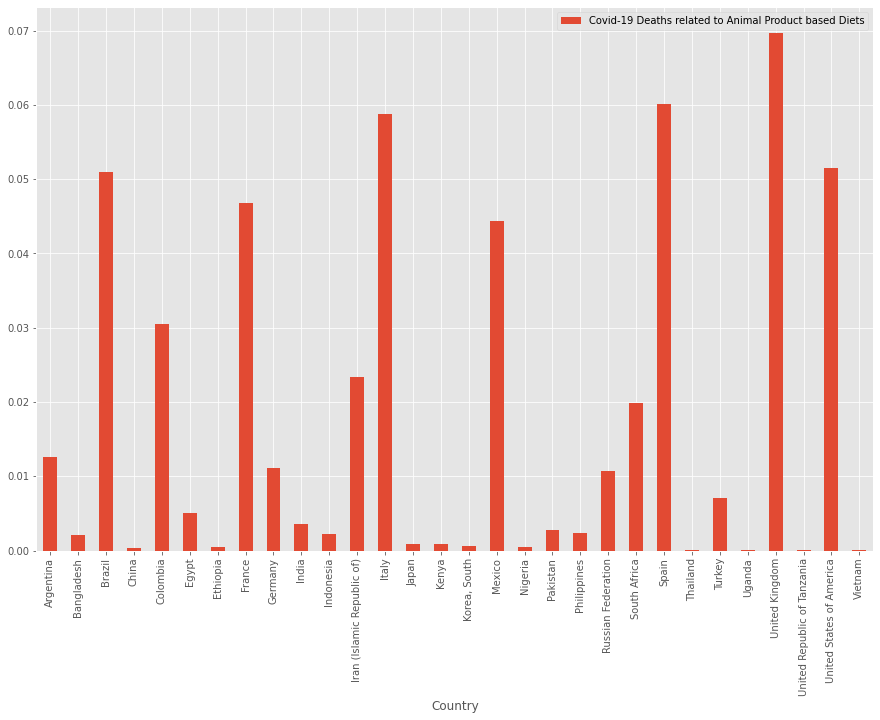

In [58]:
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

#meat_pop.plot.bar(x='Deaths', rot=0, title='Animal_Products', figsize=(15,10));
#meat_pop['Deaths'].value_counts().head().plot();
meat_pop.plot.bar(x='Country', y='Deaths', label='Covid-19 Deaths related to Animal Product based Diets', figsize=(15,10));

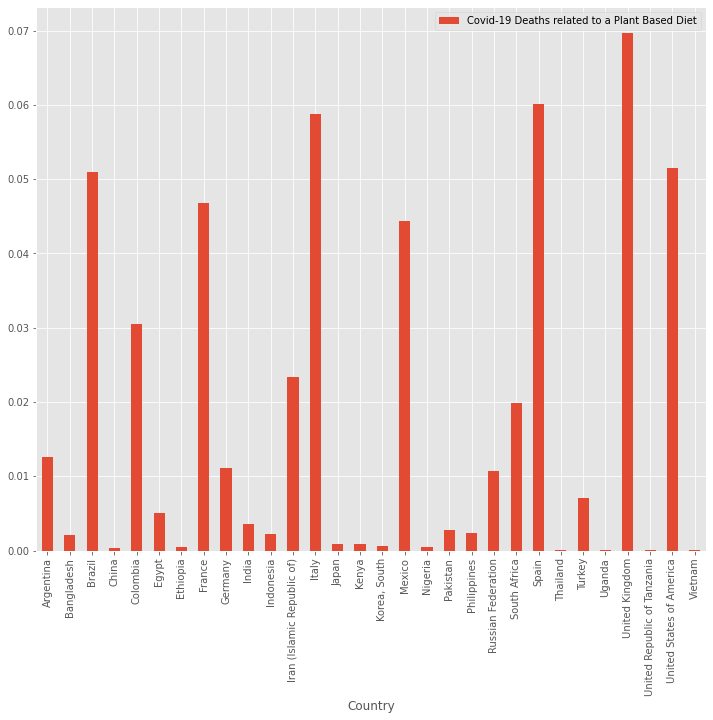

In [59]:
veg_pop.plot.bar(x='Country', y='Deaths', label='Covid-19 Deaths related to a Plant Based Diet', figsize=(12,10));

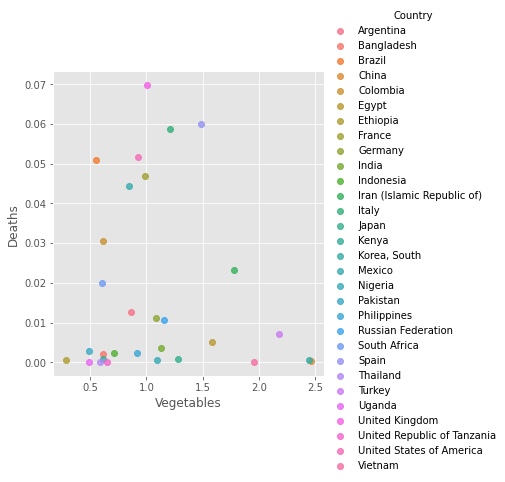

In [27]:
import seaborn as sns

#Show linear regression for Vegetables vs Deaths
#cols = ['Country', 'Deaths']
sns.lmplot(x='Vegetables', y='Deaths', data=veg_pop, ci=None, fit_reg=False, hue='Country');


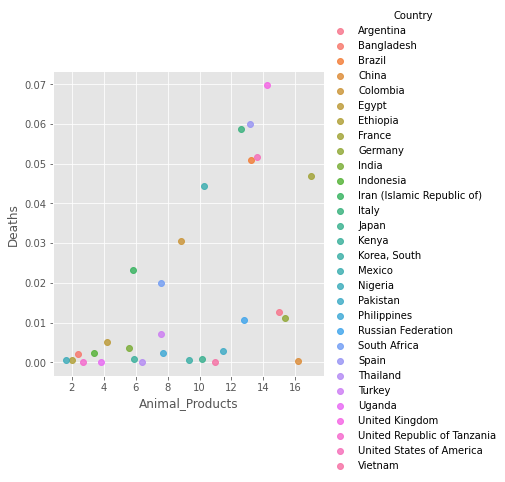

In [28]:
#Show linear regression for Animal_Products versus Deaths

sns.lmplot(x='Animal_Products', y='Deaths', data=meat_pop, ci=None, fit_reg=False, hue='Country', order=10);
#plt.xlim( );
#plt.ylim( );

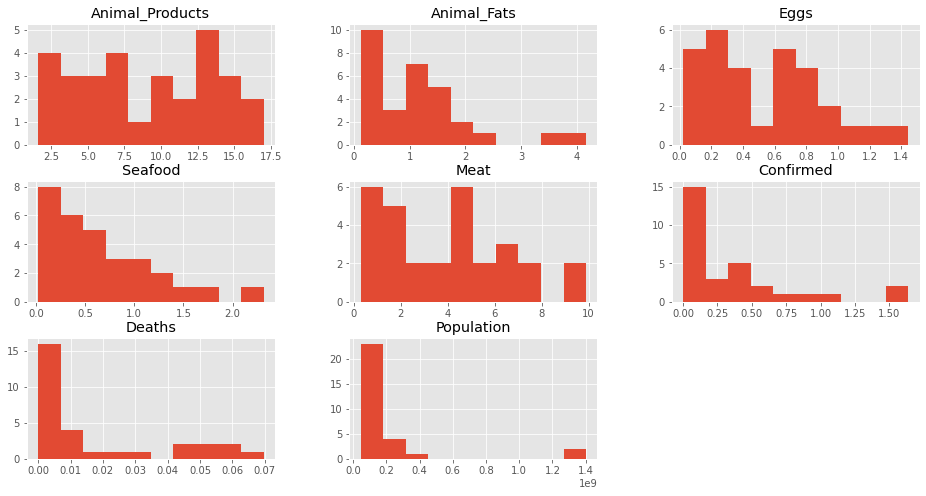

In [39]:
meat_pop.hist(figsize=(16,8));

In [41]:
meat = {'Animal_Products': pd.Series(meat_pop('Deaths')), index=['Countries']}
veggies={'Vegetables': pd.Series(veg_pop), index=['Countries']}

df_1 = pd.DataFrame(meat)
df_2 = pd.DataFrame(veg)

df_1

SyntaxError: invalid syntax (<ipython-input-41-99846919eaa8>, line 1)

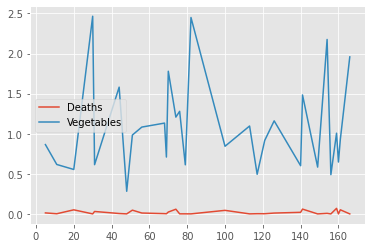

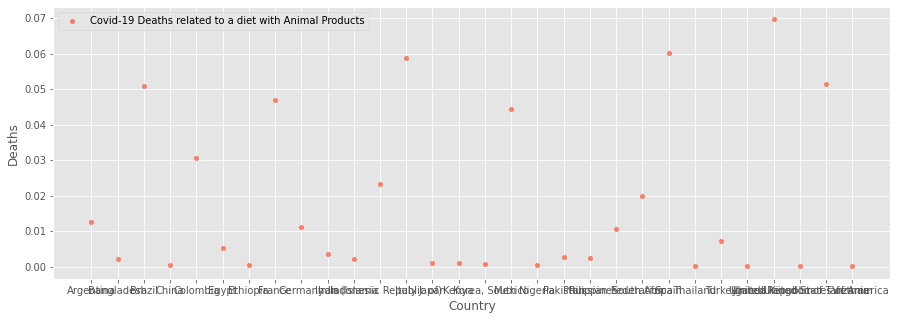

In [57]:
meat = meat_pop[['Country', 'Deaths', 'Animal_Products']].copy()
veggies = veg_pop[['Country', 'Deaths', 'Vegetables']].copy()

veggies.plot()
meat.plot(kind='scatter', x='Country', y='Deaths', \
         color='tomato', figsize=(15,5), s=20, alpha=0.8, label='Covid-19 Deaths related to a diet with Animal Products');



## Prepare a matrix from scikit-learn and comare test data missing a few countries to test data

In [29]:
#Create feature matrix (X) dropping random countries

#feature_ctry = meat_pop.columns

#n=31
#meat_pop.drop(meat_pop[meat_pop('Country')].sample(n=10).index)

meat_pop_missing = meat_pop.sample(n=20)
meat_pop_missing.head()

,Country,Animal_Products,Animal_Fats,Eggs,Seafood,Meat,Confirmed,Deaths,Population
149,Thailand,6.4025,0.3360,0.9020,1.1496,3.0775,0.005077,0.000087,6.653400e+07
31,Colombia,8.8544,0.4363,0.7433,0.2424,4.0717,0.947197,0.030534,4.944400e+07
30,China,16.1844,1.1773,1.2349,1.2872,9.8896,0.006373,0.000335,1.402385e+09
56,Germany,15.3684,4.1620,0.6187,0.5343,5.0759,0.270116,0.011086,8.330000e+07
20,Brazil,13.2061,1.5238,0.4464,0.2309,7.1571,1.576963,0.050919,2.118120e+08


In [30]:
#double check how many countries
meat_pop_missing.shape

(20, 9)